In [5]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_Basic, RPS_Basic_Multirun  # Importing RPS_Basic class from rps_base.py
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 
from rps_simulation.dynamical_models import logistic_model, general_model
from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)


# 1. Logistic Learning Curve:
We use the **Basic RPS Model**. 

Default Parameters: $a = 0.2, b=5, \alpha=0.4, \beta=0.3 $
Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$

## 1.1 Varying $a,b$:


In [7]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0, 10, 21), 3)

log_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.4, 
                 'beta': 0.3, 
                 'S_0': 0.1}

log_sen = RPS_sensitivity(log_par_dict, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars = log_sen.df_par
log_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)
df_log_sim = log_sen.df_sim


### Parameter $a$:

**Distributions of Final Skills**

1. *par_vals* = *a_vals_filt*, contains the list of $a$ values for which the histogram is wanted. 
2. *par_others* is the dictionary containing a fixed value of $b$. This is kept fixed as $a$ is varied.
3. *plot_parms* is a dictionary which can be used to change plot parameters like alpha and bandwidth, along with providing a save location.

**Distributions of Total Practice-Events**

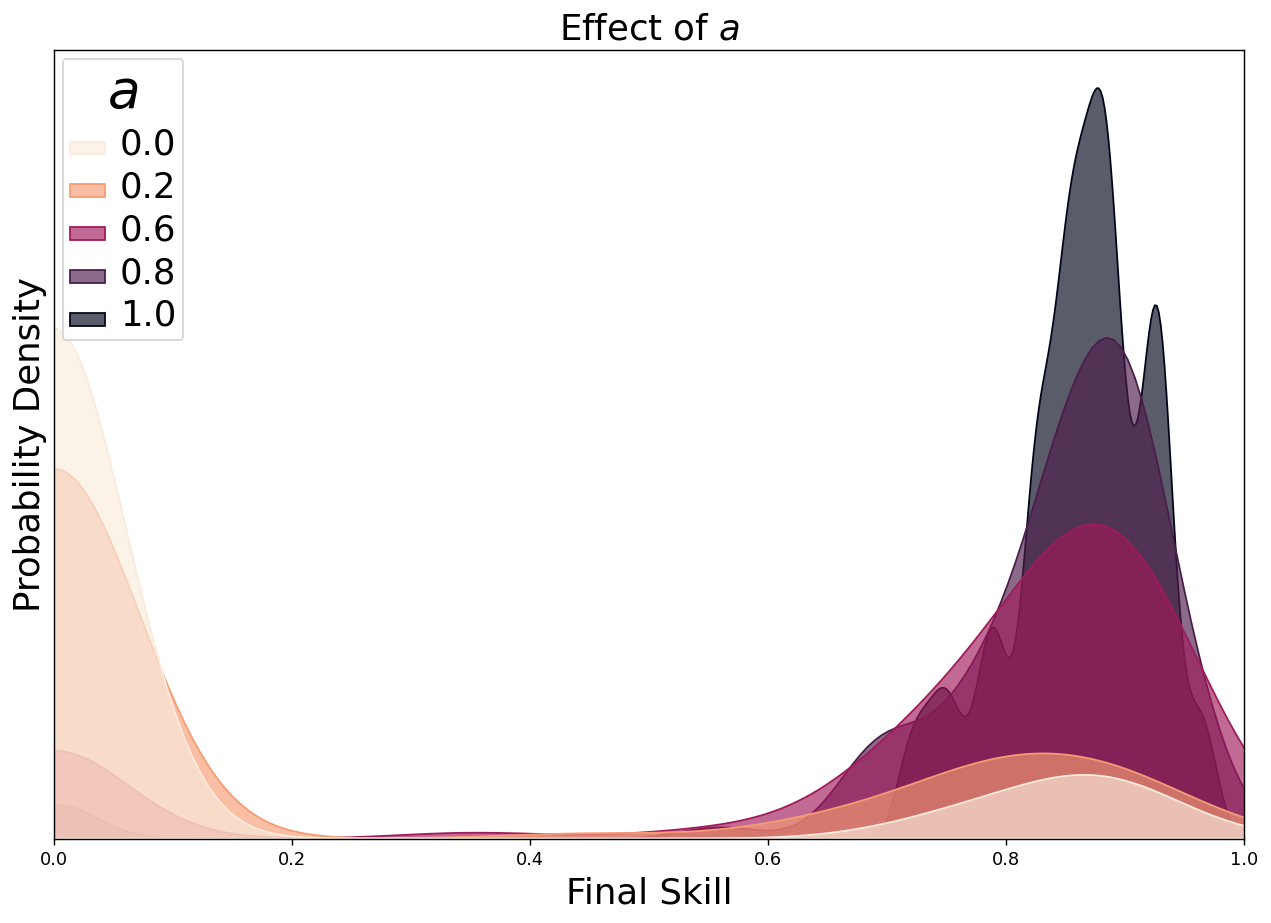

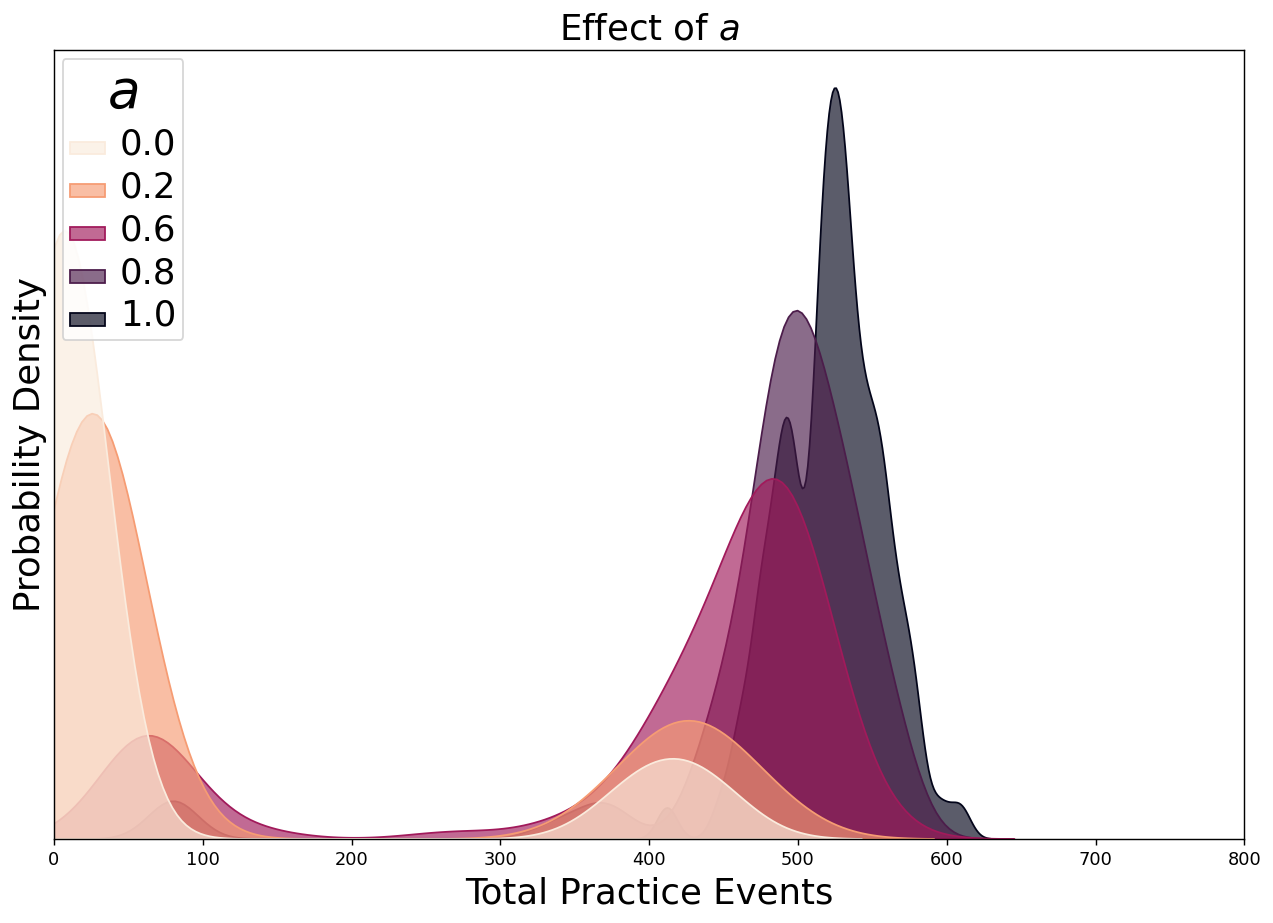

In [8]:
a_vals_filt = [0, 0.2, 0.6, 0.8, 1] # a-vals for which histogram is wanted
b_fixed = 5 # fixed b
log_sen.final_skill_histogram(param='a', par_vals=a_vals_filt,
                             par_others = {'b': 5},
                             plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 'legend_pos':'upper left',
                                           'save_location': '../plots/sens_logistic_a_finalS.png'}
                             )
log_sen.practice_events_histogram(param='a', par_vals=a_vals_filt,
                                 par_others = {'b': 5},
                                 plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 
                                               'legend_pos':'upper left','x_lim_max':800,
                                           'save_location': '../plots/sens_logistic_a_nprac.png'}
                                 )

### Parameter $b$

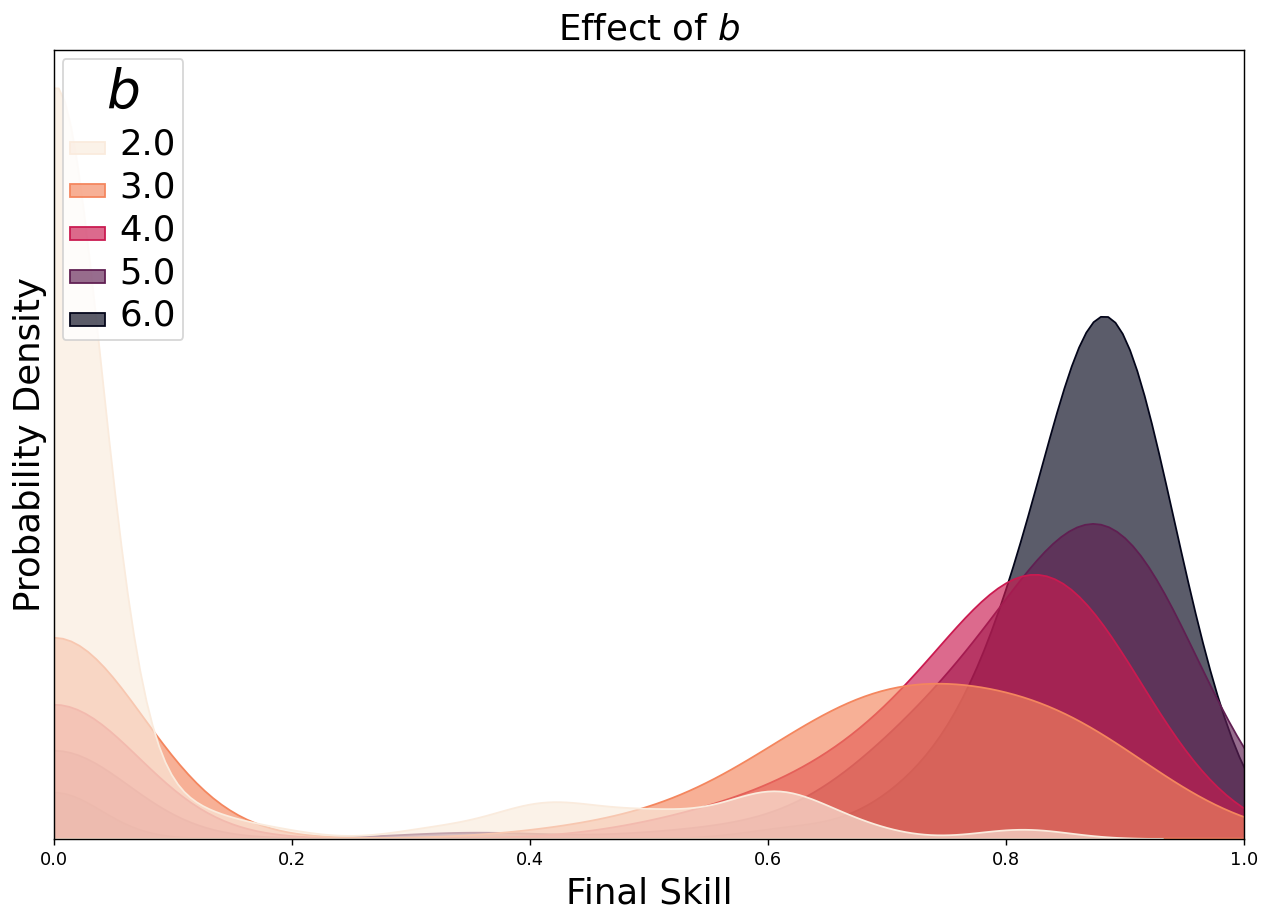

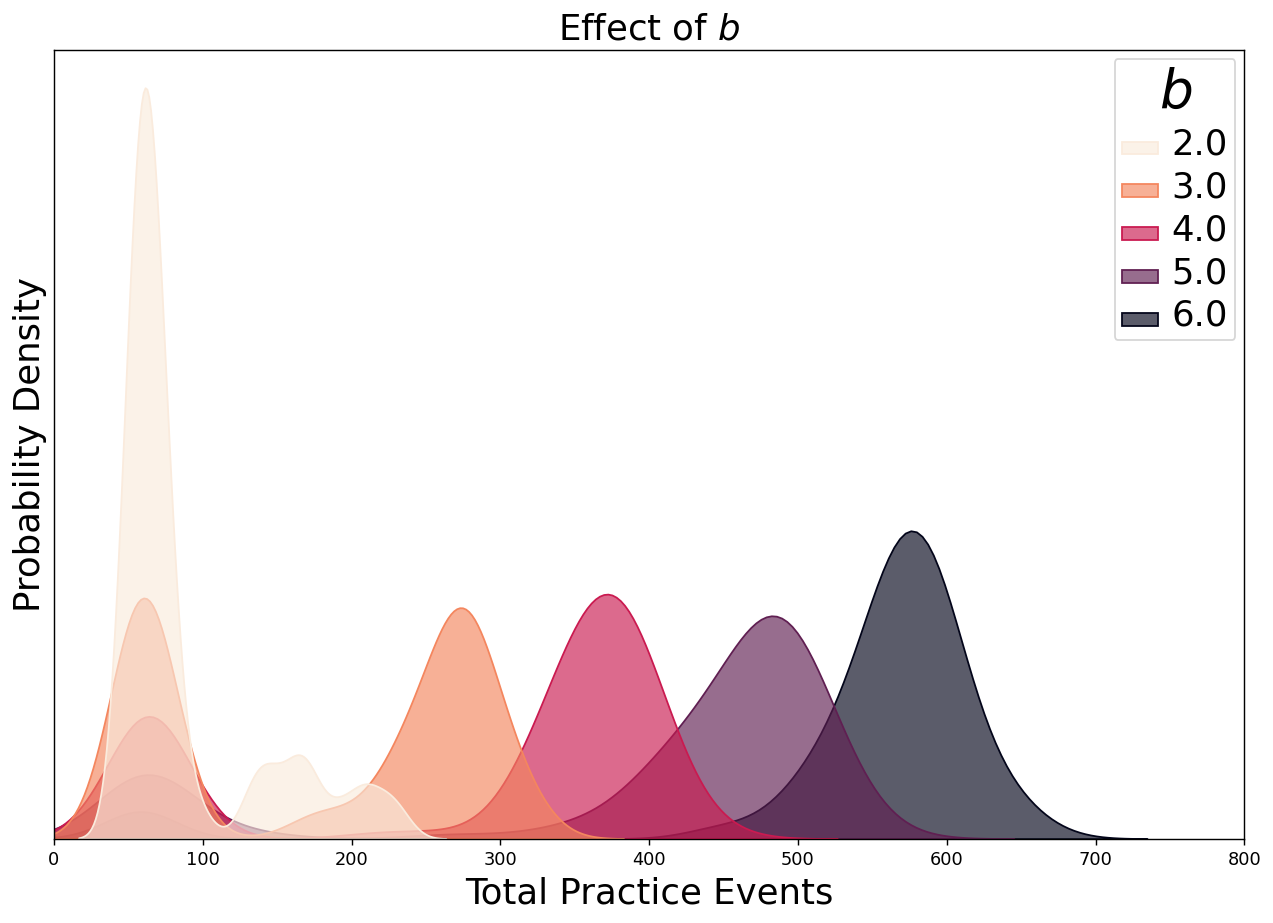

In [9]:
b_vals_filt = [2, 3, 4, 5, 6]
a_fixed = 0.6

log_sen.final_skill_histogram(param='b', par_vals=b_vals_filt,
                             par_others = {'a': a_fixed},
                             plot_parms = {'bw_adjust':0.7, 'legend_head_fs':30, 'legend_txt_fs':20,
                                           'legend_pos':'upper left', 'save_location': '../plots/sens_logistic_b_finalS.png'}
                             )

log_sen.practice_events_histogram(param='b', par_vals=b_vals_filt,
                             par_others = {'a': a_fixed},
                             plot_parms = {'bw_adjust':1, 'x_lim_max': 800, 'legend_head_fs':30, 'legend_txt_fs':20,
                                           'legend_pos':'upper right','save_location': '../plots/sens_logistic_b_nprac.png'}
                             )

### Heatmaps $a,b$:

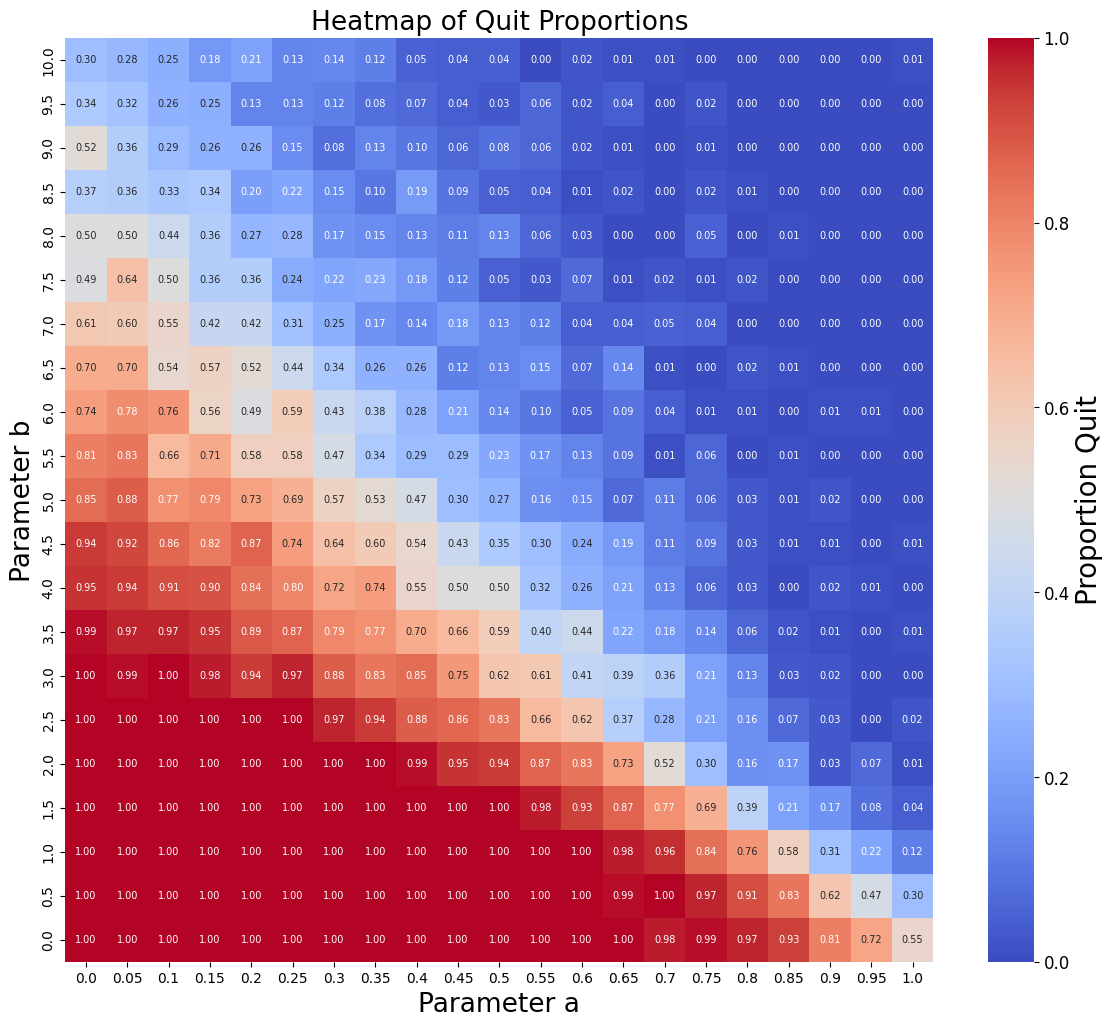

In [10]:
log_sen.heatmap(save_location='sens_log_heatmap_ab')

## 1.2 Varying Starting Skill $S_0$ 

In [11]:
# run model for different values of parameter a and b:
s0_vals = np.round(np.linspace(0.02, 0.12, 11), 3)

log_par_dict2 =  {'a': 0.6, 
                 'b': 5, 
                 'alpha': 0.4, 
                 'beta': 0.3, 
                 'S_0': s0_vals}

log_sen2 = RPS_sensitivity(log_par_dict2, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars2 = log_sen2.df_par
log_sen2.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)



In [12]:
df_log_sim2 = log_sen2.df_sim
df_log_sim2

,S_0,a,b,alpha,beta,final_skills,n_prac,prop_quit
0,0.02,0.6,5.0,0.4,0.3,5.232784e-08,51,0.9
1,0.02,0.6,5.0,0.4,0.3,5.198796e-08,51,0.9
2,0.02,0.6,5.0,0.4,0.3,4.088786e-06,64,0.9
3,0.02,0.6,5.0,0.4,0.3,2.793227e-06,63,0.9
4,0.02,0.6,5.0,0.4,0.3,4.032719e-06,64,0.9
...,...,...,...,...,...,...,...,...
1095,0.12,0.6,5.0,0.4,0.3,6.373665e-01,478,0.1
1096,0.12,0.6,5.0,0.4,0.3,9.205288e-01,490,0.1
1097,0.12,0.6,5.0,0.4,0.3,8.333588e-01,482,0.1
1098,0.12,0.6,5.0,0.4,0.3,9.517617e-01,446,0.1


In [13]:
s0_vals

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12])

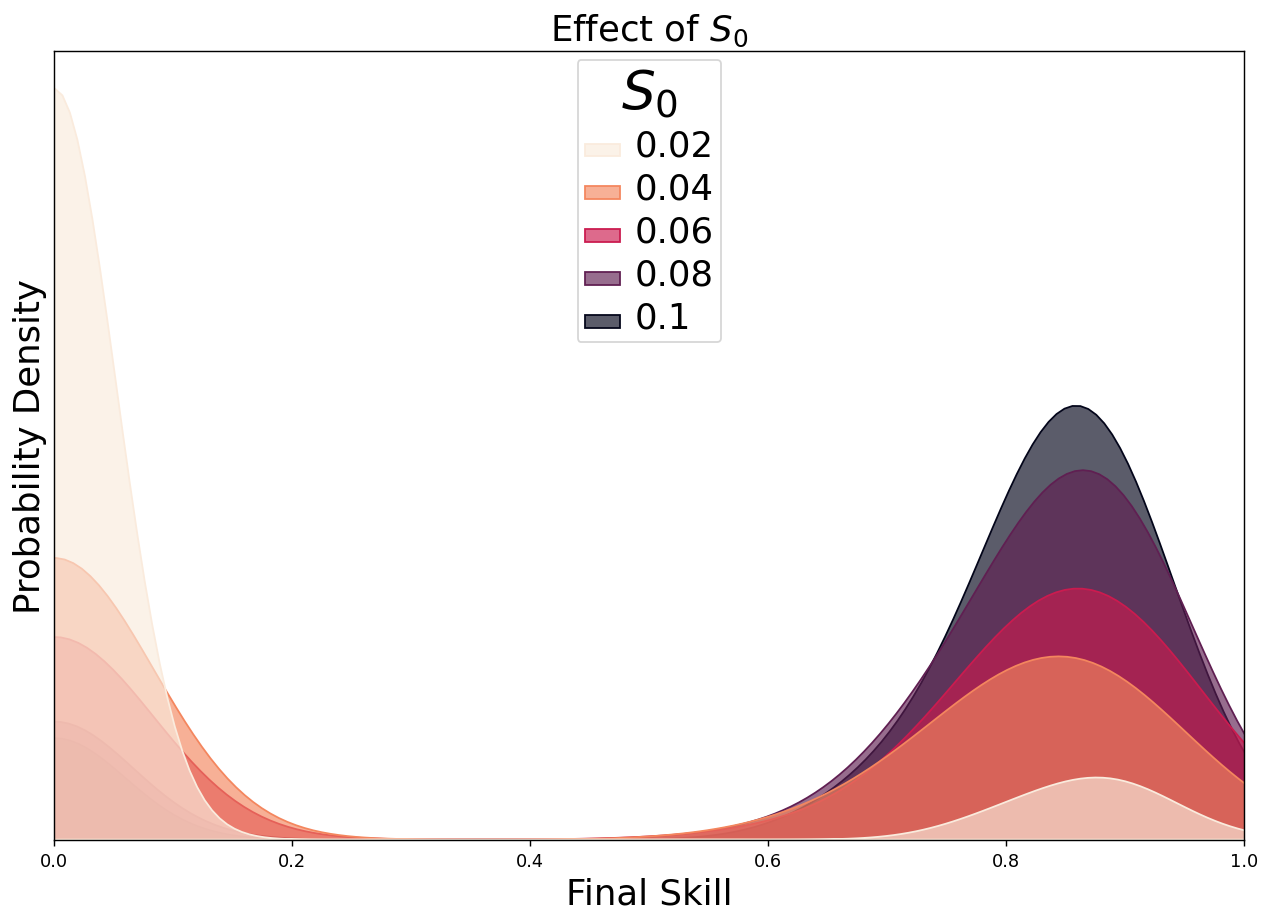

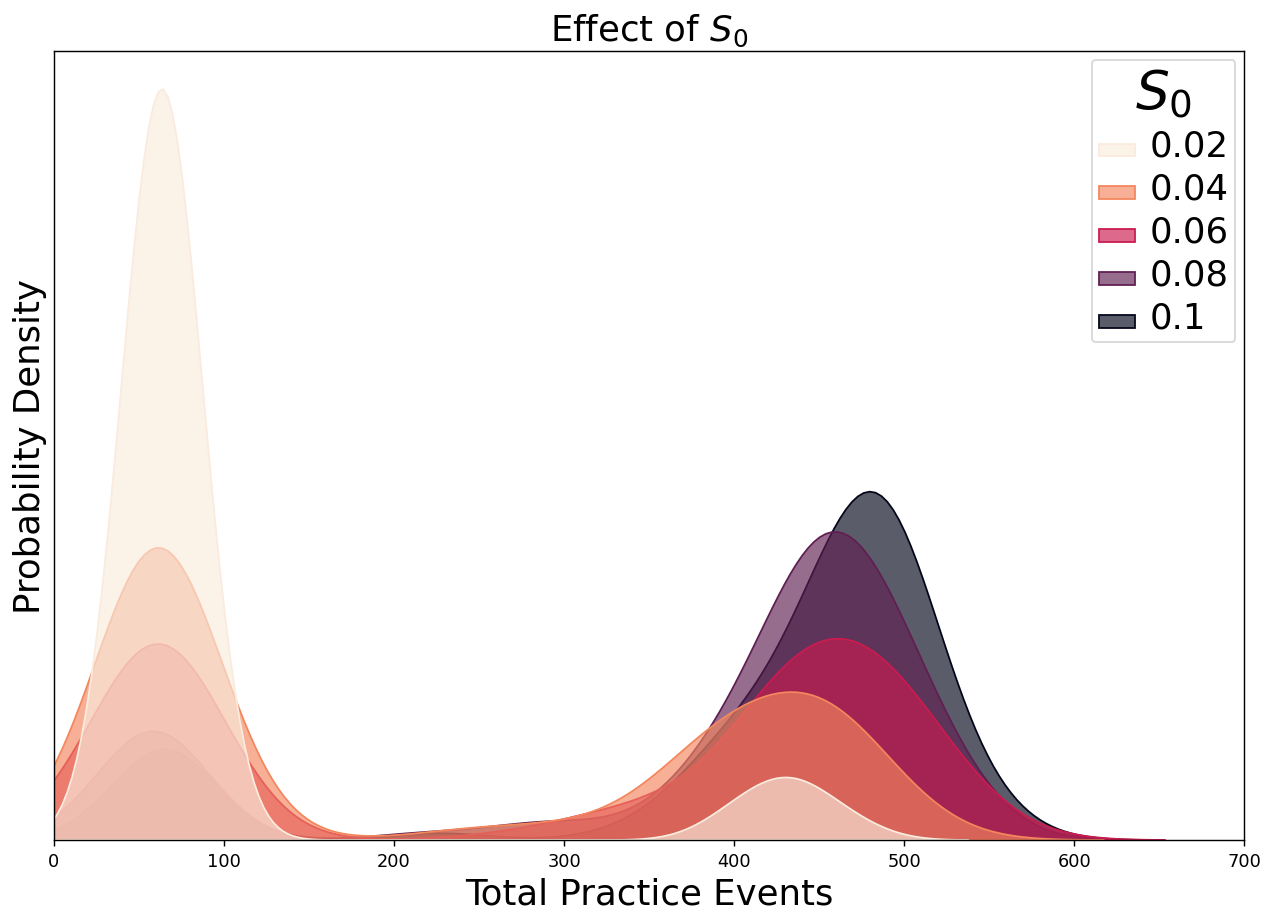

In [14]:
s0_vals_filt = [0.02 + i*0.02 for i in range(5)]
log_sen2.final_skill_histogram(param='S_0', par_vals=s0_vals_filt,
                             plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 'legend_pos':'upper center',
                                           'bw_adjust':0.5, 'save_location': '../plots/sens_logistic_s0_finalS.png'}
                             )
log_sen2.practice_events_histogram(param='S_0', par_vals=s0_vals_filt,
                                 plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 'bw_adjust':0.5, 
                                               'legend_pos':'upper right','x_lim_max':700,
                                           'save_location': '../plots/sens_logistic_s0_nprac.png'}
                                 )


## 1.3 Varying Parameters $\alpha,\beta$



In [41]:
# run model for different values of parameter a and b:
alpha_vals = np.round(np.linspace(0.05, 1.05, 21), 3)
beta_vals = np.round(np.linspace(0.05, 1.05, 21), 3)

log_par_dict3 =  {'alpha': alpha_vals, 
                 'beta': beta_vals, 
                 'a': 0.2, 
                 'b': 5, 
                 'S_0': 0.1}

log_sen_alp_bet = RPS_sensitivity(log_par_dict3, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars_alp_bet = log_sen_alp_bet.df_par
log_sen_alp_bet.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)
df_log_sim_alp_bet = log_sen_alp_bet.df_sim


### Parameter $\alpha$

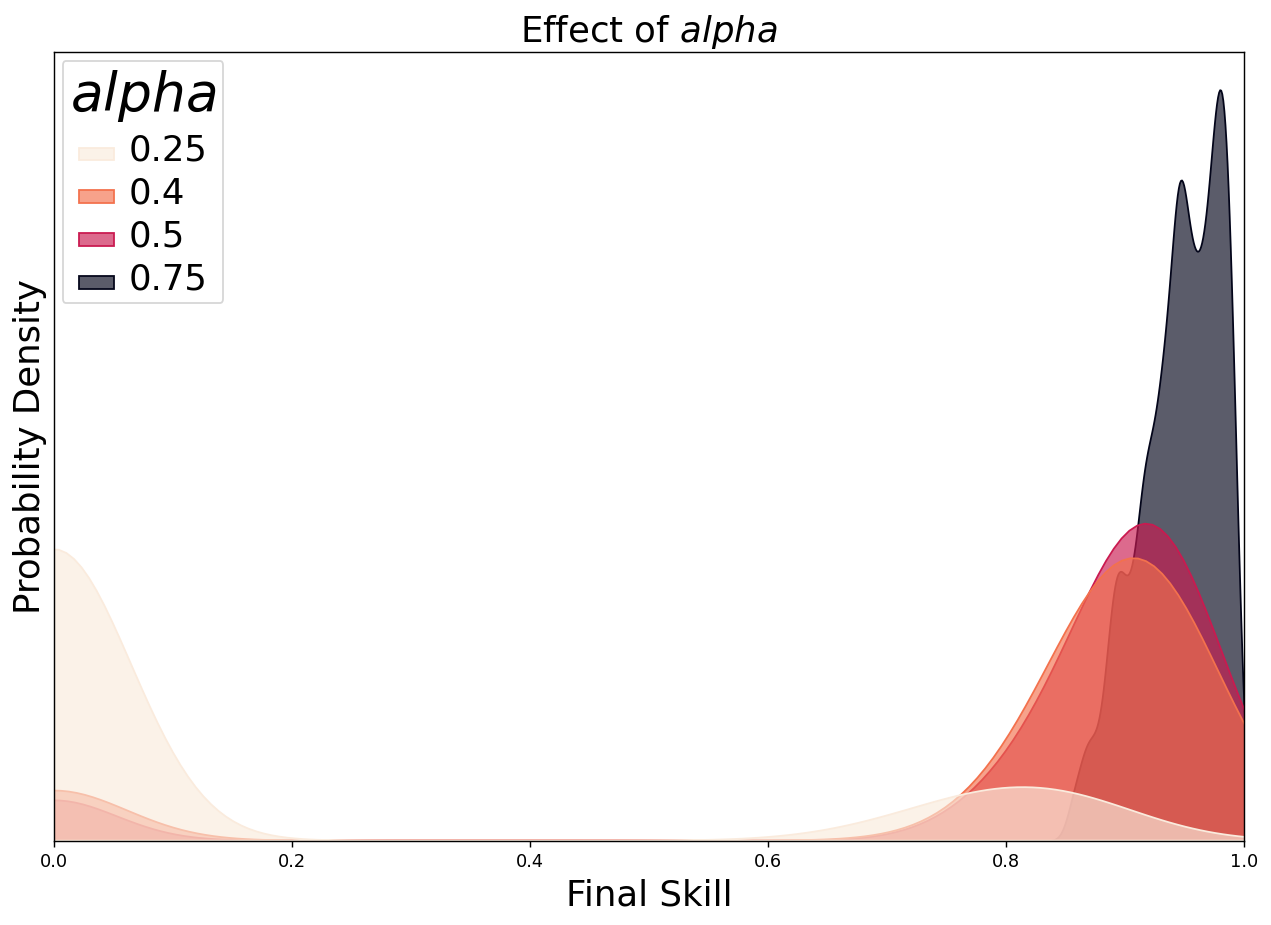

In [42]:
alpha_vals_filt = [0.25, 0.4, 0.5, 0.75] # varying alpha vals 
beta_fixed = 5 # fixed beta
log_sen_alp_bet.final_skill_histogram(param='alpha', par_vals=alpha_vals_filt,
                             par_others = {'beta': 0.2},
                             plot_parms = {'bw_adjust':1, 'legend_head_fs':30, 'legend_txt_fs':20, 'legend_pos':'upper left',
                                           'save_location': '../plots/sens_logistic_alpha_finalS.png'}
                             )
# log_sen_alp_bet.practice_events_histogram(param='alpha', par_vals=alpha_vals_filt,
#                                  par_others = {'beta': 5},
#                                  plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 
#                                                'legend_pos':'upper left','x_lim_max':800,
#                                            'save_location': '../plots/sens_logistic_alpha_nprac.png'}
#                                  )

### Heatmap $\alpha, \beta$

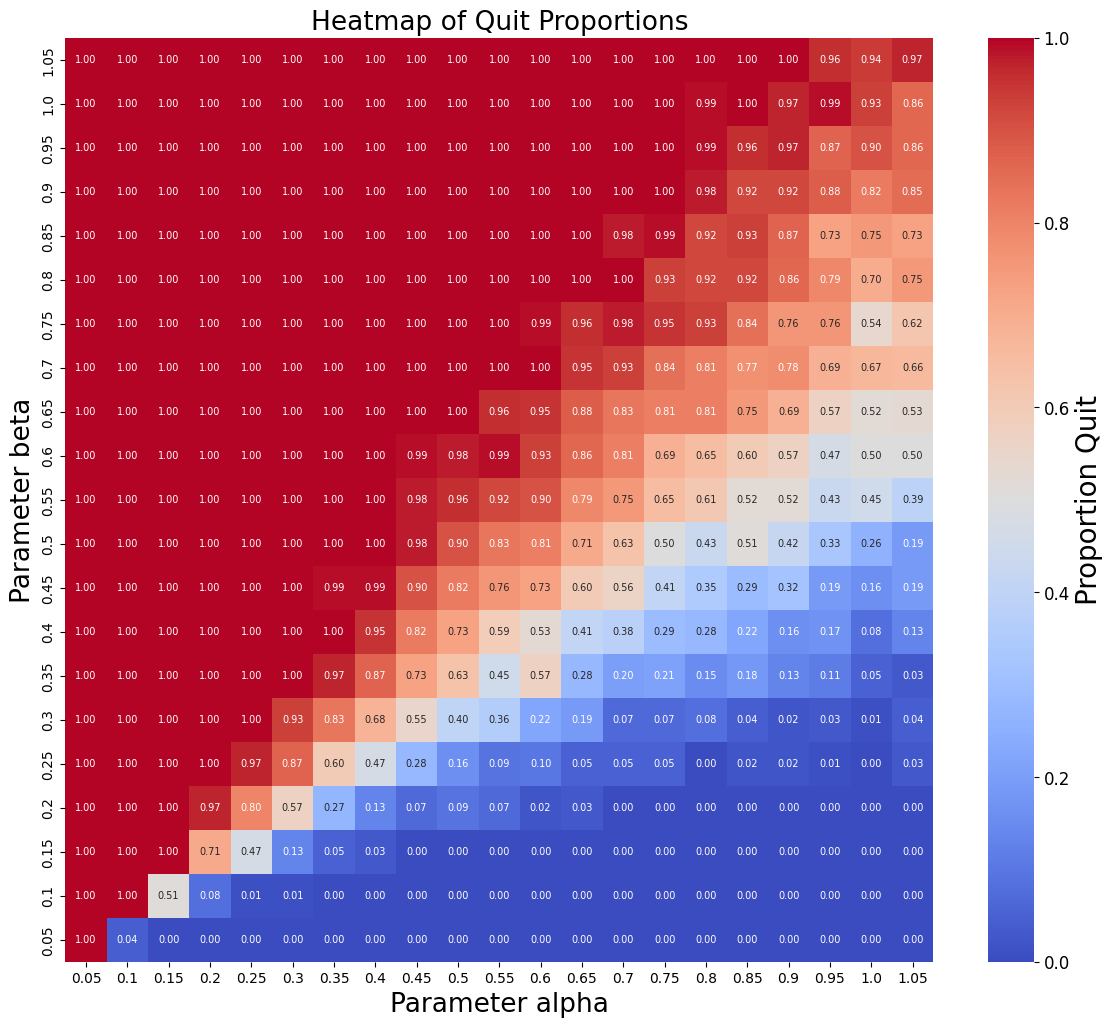

In [43]:
log_sen_alp_bet.heatmap(save_location='sens_log_heatmap_alp_bet', param_x = 'alpha', param_y='beta')

# 2. Exponential Learning Curve (Concacve):
Default Parameters: $a = 0.2, b=5, \alpha=0.2, \beta=0.3$

Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$


In [171]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0.1, 10.1, 21),3)

exp_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.2, 
                 'beta': 0.3, 
                 'initial_skill': 0.1}

exp_sen = RPS_sensitivity(exp_par_dict, learning='exponential', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_exp_pars = exp_sen.df_par
exp_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=50, max_time=100)
df_exp_sim = exp_sen.df_sim


In [172]:
df_exp_sim.head(5)

,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
0,0.0,0.1,0.2,0.3,0.1,3.967148e-05,3,0.94
1,0.0,0.1,0.2,0.3,0.1,2.609368e-07,5,0.94
2,0.0,0.1,0.2,0.3,0.1,3.233781e-14,1,0.94
3,0.0,0.1,0.2,0.3,0.1,3.236193e-14,1,0.94
4,0.0,0.1,0.2,0.3,0.1,1.711662e-02,2,0.94


## 2.1 Parameter $a$:

In [210]:
#rev_palette = sns.color_palette('mako').reverse()

######### Processing Data ###########

b_fixed = 5.1 # fix value of parameter b
a_vals = [0, 0.25, 0.5, 0.75, 1]

df_exp_a = df_exp_sim[(df_exp_sim['b']==b_fixed) & (df_exp_sim['a'].isin(a_vals))]
#df_exp_a

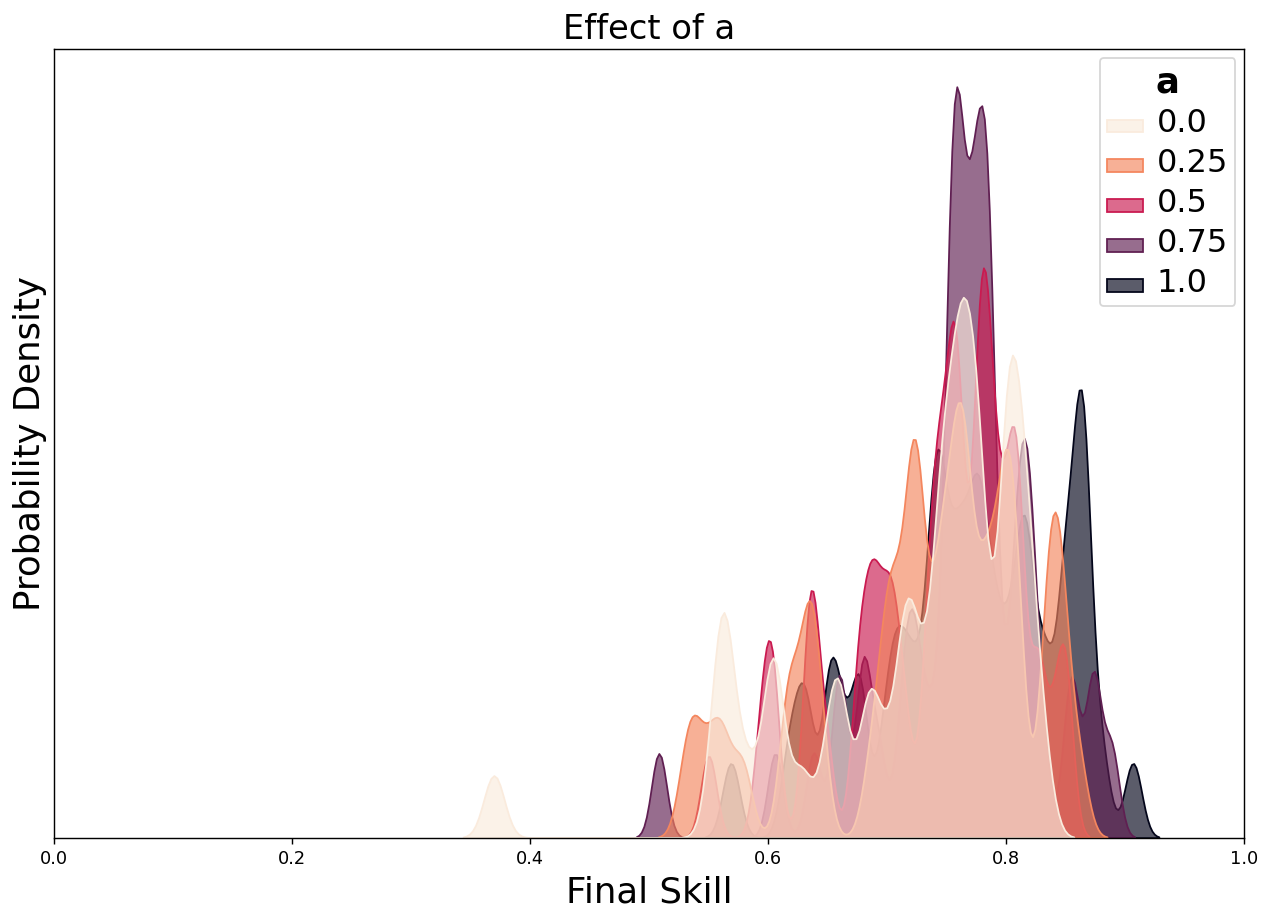

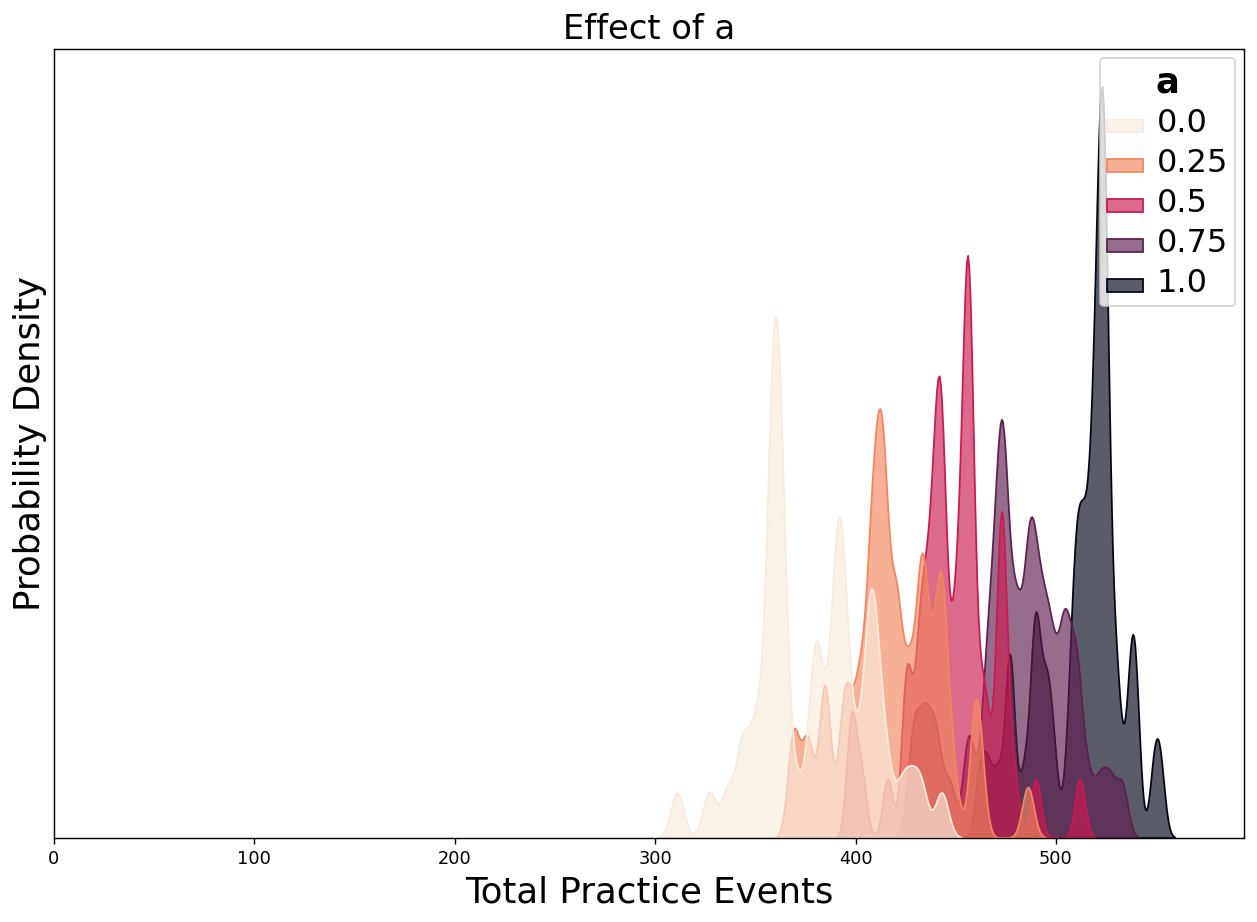

In [211]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
#ax_log = sns.kdeplot(df_log_a, x='final_skills', hue='a', alpha=.7, palette='rocket_r', fill=True,  bw_adjust=0.07, multiple='stack')
ax_log = sns.kdeplot(df_exp_a, x='final_skills', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,1])
#plt.ylim([0,8])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#plt.legend('a', fontsize=17)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='a', fontweight='heavy')  


#plt.savefig('../plots/sens_exp_a_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
#with sns.color_palette("mako"):
ax_log = sns.kdeplot(df_exp_a, x='n_prac', hue='a', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.25)
plt.title('Effect of a', fontsize=19)
plt.xlim([0,max(df_log_a['n_prac'])])
#plt.tick_params(left=True, labelleft=True)

plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='a', fontweight='heavy')  


#plt.savefig('../plots/sens_exp_a_nprac.png', dpi=512)
# Display the plot
plt.show()

## 2.2 Parameter $b$:

In [183]:
a_fixed = 0.6 # fix value of parameter a
b_vals = [2.1 + i for i in range(5)]

df_exp_b = df_exp_sim[(df_exp_sim['a']==a_fixed) & (df_exp_sim['b'].isin(b_vals))]
df_exp_b.head(5)

,a,b,alpha,beta,initial_skill,final_skills,n_prac,prop_quit
12800,0.6,2.1,0.2,0.3,0.1,0.593869,193,0.0
12801,0.6,2.1,0.2,0.3,0.1,0.568945,170,0.0
12802,0.6,2.1,0.2,0.3,0.1,0.517653,209,0.0
12803,0.6,2.1,0.2,0.3,0.1,0.583948,188,0.0
12804,0.6,2.1,0.2,0.3,0.1,0.428201,199,0.0


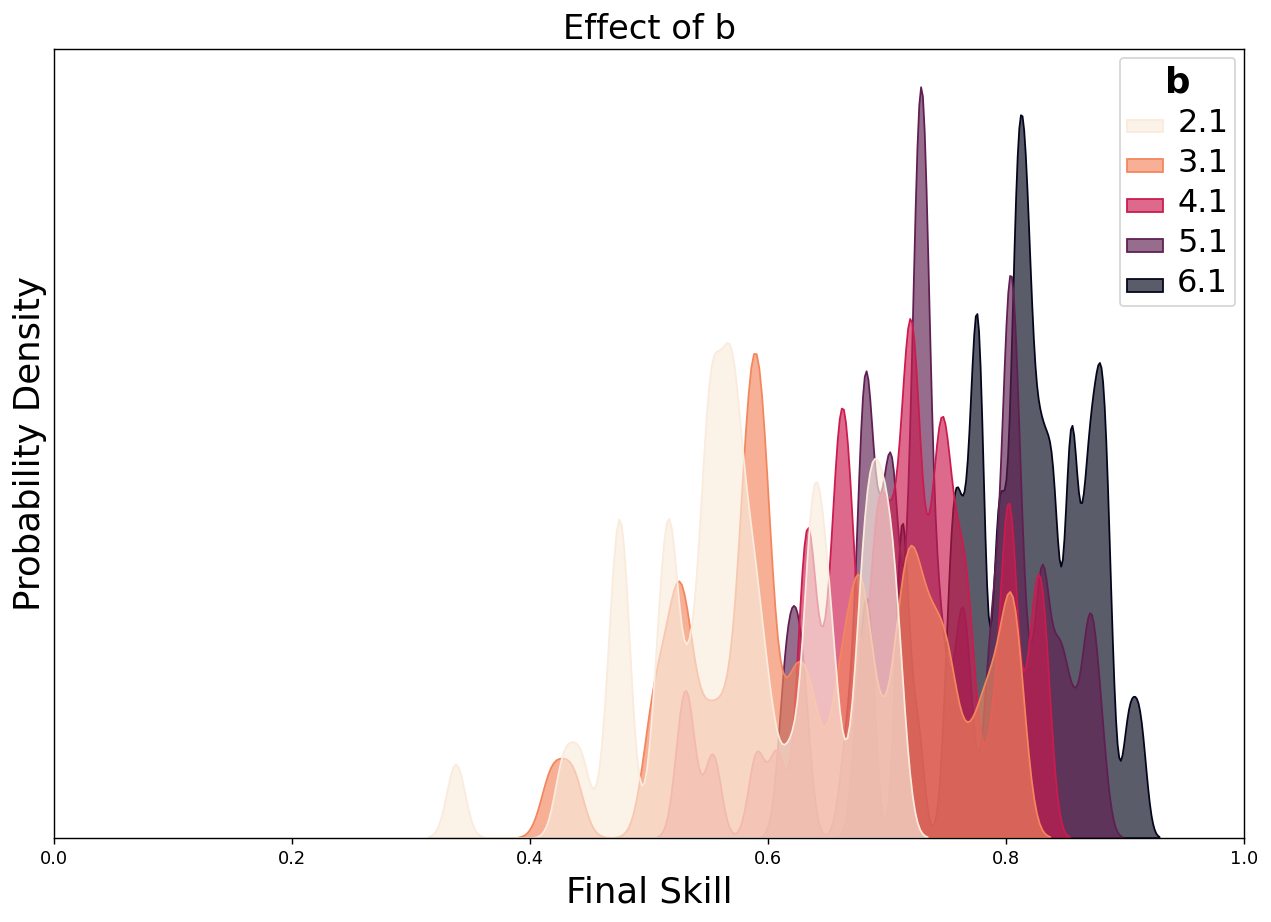

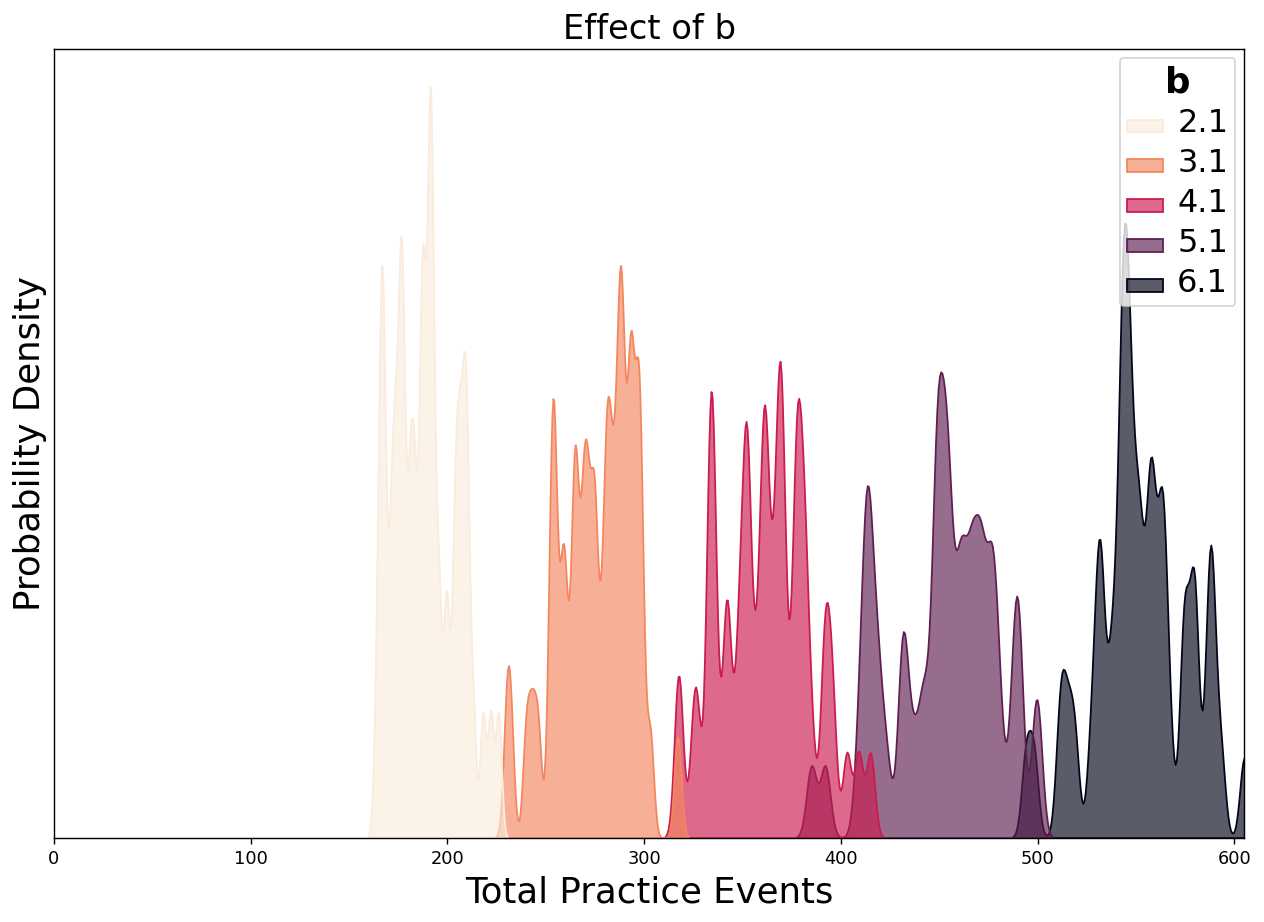

In [184]:
########################
## HISTOGRAM: FINAL SKILL
########################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_exp_b, x='final_skills', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,1])
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Final Skill', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
#sns.move_legend(ax_log, "upper left")

# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='b', fontweight='heavy')  

#plt.savefig('../plots/sens_exp_b_finalS.png', dpi=512)
# Display the plot
plt.show()

####################################
## HISTOGRAM: TOTAL PRACTICE EVENTS
###################################

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=128)
ax_log = sns.kdeplot(df_exp_b, x='n_prac', hue='b', alpha=.65, palette='rocket_r', fill=True,  bw_adjust=0.2)
plt.title('Effect of b', fontsize=19)
plt.xlim([0,max(df_exp_b['n_prac'])])
#plt.tick_params(left=True, labelleft=True)
plt.tick_params(left=False, labelleft=False)
plt.xlabel('Total Practice Events', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
# for legend text
plt.setp(ax_log.get_legend().get_texts(), fontsize='18')  
# for legend title
plt.setp(ax_log.get_legend().get_title(), fontsize='20', text='b', fontweight='heavy')  
#sns.move_legend(ax_log, "upper left")

#plt.savefig('../plots/sens_exp_b_nprac.png', dpi=512)
# Display the plot
plt.show()

## 2.3 Heatmap $a,b$

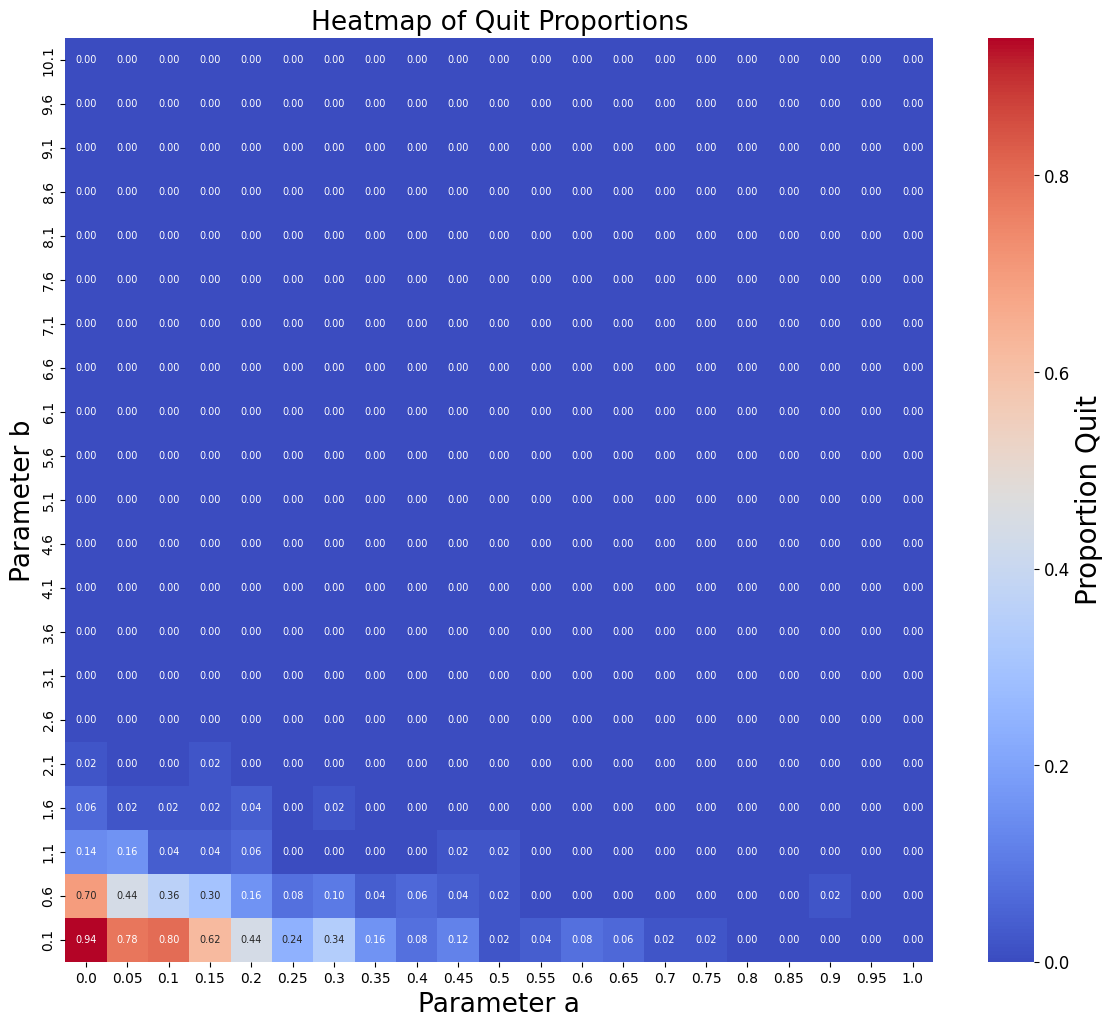

In [190]:
pivot_table = df_exp_pars.pivot(index="b", columns="a", values="prop_quit")

# Plotting the heatmap
plt.figure(figsize=(14, 12))
#ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":6}, cbar_kws={'label': 'Proportion Quit'})
ax = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize":7})

ax.figure.axes[-1].set_ylabel('Proportion Quit', size=20)
plt.gca().invert_yaxis()

# Increase the label size for the color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)


plt.title('Heatmap of Quit Proportions', fontsize=19)
plt.xlabel('Parameter a', fontsize=19)
plt.ylabel('Parameter b', fontsize=19)
#plt.savefig('../plots/sens_exp_heatmap_ab.png', dpi=512)
plt.show()